#CARGAR LIBRERÍAS Y MONTAR DRIVE Y RUTA DE ARCHIVOS

In [571]:
# imports time series
import pandas as pd
import numpy as np
import seaborn as sns

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# para calculas métricas del modelo
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


# misc
import os
import time
import itertools
import warnings
warnings.filterwarnings("ignore")

# apartado ts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from prophet import Prophet

import time

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)


#--------------------------------------------------------
# imports best practice sklearn
import sklearn
from sklearn import set_config

from sklearn.tree import DecisionTreeClassifier

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model selection e hiperparameters optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold

from sklearn.metrics import accuracy_score


In [572]:
# from google.colab import drive
#drive.mount('/content/drive')

In [573]:
#!pip install scikit-learn==1.2

In [575]:
DATA_PATH = 'C://Users//Usuario//OneDrive//Workplace//Projects//TFM_easyMoney//data//'

print(DATA_PATH)

C://Users//Usuario//OneDrive//Workplace//Projects//TFM_easyMoney//data//


In [576]:
print("Working with these versions of libraries\n")
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")
print(f"Sklearn version {sklearn.__version__}")

Working with these versions of libraries

Numpy version 1.24.4
Pandas version 2.0.1
Sklearn version 1.2.0


#CARGAR BASE DE DATOS Y PRIMERA VISTA DE LOS DF

Archivo de excel de análisis de las BBDD así como los tratamientos que se le irán dando a cada una
[Diccionario base de datos](https://docs.google.com/spreadsheets/d/1R8So6h8ifVWm_rLEVhfNxfsV0_jN--tG/edit?usp=sharing&ouid=102038681217647240769&rtpof=true&sd=true)

##ARCHIVO PRODUCT_DESCRIPCION

In [577]:
df_prod_descrip = pd.read_csv(os.path.join(DATA_PATH, "product_description.csv"))

In [578]:
df_prod_descrip.head(5)

,Unnamed: 0,pk_product_ID,product_desc,family_product
0,0,4657,em_acount,account
1,1,3819,debit_card,payment_card
2,2,1364,pension_plan,pension_plan
3,3,2234,payroll,account
4,4,2235,payroll_account,account


In [579]:
df_prod_descrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      13 non-null     int64 
 1   pk_product_ID   13 non-null     int64 
 2   product_desc    13 non-null     object
 3   family_product  13 non-null     object
dtypes: int64(2), object(2)
memory usage: 548.0+ bytes


##ARCHIVO SALES

In [580]:
df_sales = pd.read_csv(os.path.join(DATA_PATH, "sales.csv"))

In [581]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240773 non-null  int64  
 1   pk_sale        240773 non-null  int64  
 2   pk_cid         240773 non-null  int64  
 3   month_sale     240773 non-null  object 
 4   pk_product_ID  240773 non-null  int64  
 5   net_margin     240773 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.0+ MB


In [582]:
df_filtered2 = df_sales[df_sales['pk_cid'] == 1539547].copy()
df_filtered2.head().T

,6500,84427,122665,235481
Unnamed: 0,6500,84427,122665,235481
pk_sale,13166,91093,129331,242147
pk_cid,1539547,1539547,1539547,1539547
month_sale,2019-05-01,2019-04-01,2019-05-01,2019-03-01
pk_product_ID,2673,8871,3819,4657
net_margin,1584.0,58.9,56.3,74.0


In [583]:
df_filtered2 = df_sales[df_sales['pk_cid'] == 1470482].copy()
df_filtered2.head().T

,31839,51061,68802,197172
Unnamed: 0,31839,51061,68802,197172
pk_sale,38505,57727,75468,203838
pk_cid,1470482,1470482,1470482,1470482
month_sale,2018-11-01,2018-11-01,2018-12-01,2018-10-01
pk_product_ID,2234,1364,2235,4657
net_margin,59.4,5576.3,63.0,61.9


In [584]:
df_sales.head(20000)

,Unnamed: 0,pk_sale,pk_cid,month_sale,pk_product_ID,net_margin
0,0,6666,33620,2018-05-01,2335,952.9
1,1,6667,35063,2018-06-01,2335,1625.2
2,2,6668,37299,2018-02-01,2335,1279.7
3,3,6669,39997,2018-02-01,2335,1511.9
4,4,6670,44012,2018-02-01,2335,1680.3
...,...,...,...,...,...,...
19995,19995,26661,1141383,2018-03-01,2234,87.9
19996,19996,26662,1141399,2018-03-01,2234,72.5
19997,19997,26663,1141404,2018-02-01,2234,61.4
19998,19998,26664,1141434,2018-08-01,2234,66.9


In [585]:
df_sales.sort_values('month_sale')

,Unnamed: 0,pk_sale,pk_cid,month_sale,pk_product_ID,net_margin
134089,134089,140755,1341608,2018-02-01,4657,65.8
18076,18076,24742,1080550,2018-02-01,2234,64.2
72810,72810,79476,1011837,2018-02-01,8871,108.7
72798,72798,79464,1010848,2018-02-01,8871,70.4
35681,35681,42347,1025040,2018-02-01,1364,3502.6
...,...,...,...,...,...,...
53873,53873,60539,1542780,2019-05-01,1364,6396.5
53871,53871,60537,1542720,2019-05-01,1364,8807.7
53870,53870,60536,1542695,2019-05-01,1364,7629.4
53868,53868,60534,1542673,2019-05-01,1364,5319.0


In [586]:
df_sales.sort_values(by=['month_sale', 'pk_sale'])


,Unnamed: 0,pk_sale,pk_cid,month_sale,pk_product_ID,net_margin
2,2,6668,37299,2018-02-01,2335,1279.7
3,3,6669,39997,2018-02-01,2335,1511.9
4,4,6670,44012,2018-02-01,2335,1680.3
11,11,6677,148406,2018-02-01,2335,1524.1
26,26,6692,287435,2018-02-01,2335,1035.5
...,...,...,...,...,...,...
240768,240768,247434,1553456,2019-05-01,4657,56.7
240769,240769,247435,1553541,2019-05-01,4657,66.5
240770,240770,247436,1553559,2019-05-01,4657,73.0
240771,240771,247437,1553565,2019-05-01,4657,82.3


In [587]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240773 non-null  int64  
 1   pk_sale        240773 non-null  int64  
 2   pk_cid         240773 non-null  int64  
 3   month_sale     240773 non-null  object 
 4   pk_product_ID  240773 non-null  int64  
 5   net_margin     240773 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.0+ MB


In [588]:
# Renombra la columna "cid" a "pk_cid"
df_sales = df_sales.rename(columns={'cid': 'pk_cid'})
df_sales = df_sales.rename(columns={'product_ID': 'pk_product_ID'})

In [589]:
df_sales.columns

Index(['Unnamed: 0', 'pk_sale', 'pk_cid', 'month_sale', 'pk_product_ID',
       'net_margin'],
      dtype='object')

In [590]:
df_sales["month_sale"].nunique()

16

##ARCHIVO CUSTOMER_PRODUCTS

In [591]:
df_customer_products = pd.read_csv(os.path.join(DATA_PATH, "customer_products.csv"))

In [592]:
df_filtered = df_customer_products[df_customer_products['pk_cid'] == 1539547].copy()
df_filtered.head().T

,4883802,5086323,5671843
Unnamed: 0,11252146,11909813,13328745
pk_cid,1539547,1539547,1539547
pk_partition,2019-03,2019-04,2019-05
short_term_deposit,0,0,0
loans,0,0,0
mortgage,0,0,0
funds,0,0,0
securities,0,0,1
long_term_deposit,0,0,0
em_account_pp,0,0,0


In [593]:
df_customer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 818.9+ MB


In [594]:
df_customer_products.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [595]:
df_customer_products[df_customer_products.isnull().any(axis=1)]

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
20679,20792,1023793,2018-01,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
45769,46071,1097831,2018-01,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
51586,51949,1132935,2018-01,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
56072,56489,1118340,2018-01,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
102989,176458,1266281,2018-01,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174495,2780473,1164621,2018-05,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
1193187,2799237,1263889,2018-05,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
1194282,2800342,1261206,2018-05,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
1199121,2805213,1251445,2018-05,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0


##ARCHIVO CUSTOMER_COMMERCIAL_ACTIVITY

In [596]:
df_customer_commercial_activity = pd.read_csv(os.path.join(DATA_PATH, "customer_commercial_activity.csv"))

In [597]:
df_customer_commercial_activity.head(5)

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [598]:
df_customer_commercial_activity.isnull().sum()

Unnamed: 0              0
pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [599]:
df_customer_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


In [600]:
df_customer_commercial_activity['pk_cid'].nunique

<bound method IndexOpsMixin.nunique of 0          1375586
1          1050611
2          1050612
3          1050613
4          1050614
            ...   
5962919    1166765
5962920    1166764
5962921    1166763
5962922    1166789
5962923    1550586
Name: pk_cid, Length: 5962924, dtype: int64>

In [601]:
df_customer_commercial_activity['pk_cid'].nunique()


456373

In [602]:
df_customer_commercial_activity[df_customer_commercial_activity['pk_cid'] == 1387215].head(20)

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
584084,1667901,1387215,2018-03,2018-03,KHK,1.0,01 - TOP
836838,2305122,1387215,2018-04,2018-03,KHK,1.0,01 - TOP
1121946,2727756,1387215,2018-05,2018-03,KHK,1.0,01 - TOP
1371157,3357237,1387215,2018-06,2018-03,KHK,1.0,01 - TOP
1771509,4561710,1387215,2018-07,2018-03,KHK,1.0,01 - TOP
1990769,5077214,1387215,2018-08,2018-03,KHK,1.0,01 - TOP
2453837,6224434,1387215,2018-09,2018-03,KHK,1.0,01 - TOP
2772483,6590990,1387215,2018-10,2018-03,KHK,1.0,01 - TOP
3190683,7820090,1387215,2018-11,2018-03,KHK,1.0,01 - TOP
3773815,9013628,1387215,2018-12,2018-03,KHK,1.0,01 - TOP


In [603]:
df_customer_commercial_activity.isnull().sum()

Unnamed: 0              0
pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [604]:
df_customer_commercial_activity[df_customer_commercial_activity.isnull().any(axis=1)]

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
18665,18765,1060507,2018-01,2015-10,KFC,0.0,NaN
30736,30944,1035728,2018-01,2015-07,NaN,0.0,NaN
33894,34117,1040205,2018-01,2015-08,NaN,1.0,NaN
52580,52966,1125388,2018-01,2016-03,RED,0.0,NaN
57463,57893,1115187,2018-01,2015-12,NaN,1.0,NaN
...,...,...,...,...,...,...,...
5947993,13632377,1185013,2019-05,2019-05,NaN,1.0,NaN
5956953,13641337,1168909,2019-05,2016-08,NaN,1.0,NaN
5958078,13642462,1173729,2019-05,2016-09,NaN,1.0,NaN
5960641,13645025,1164094,2019-05,2019-05,KFC,1.0,NaN


In [605]:
df_customer_commercial_activity[(df_customer_commercial_activity['entry_channel'].isnull()) & (df_customer_commercial_activity['segment'].isnull())].shape[0]
#los que no tienen entry channel son casi todos los mismos que no tienen segmento.

132423

###Analisis de columna segmento

In [606]:
print(df_customer_commercial_activity['segment'].value_counts())

segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: count, dtype: int64


In [607]:
df_customer_commercial_activity['segment'].isnull().sum()

133944

In [608]:
df_customer_sociod = pd.read_csv(os.path.join(DATA_PATH, "customer_sociodemographics.csv"))

In [609]:
df_segmento = pd.merge(df_customer_sociod[['pk_cid', 'age']], df_customer_commercial_activity[['pk_cid', 'segment','entry_channel']], on='pk_cid')


In [610]:
df_segmento = df_segmento.drop_duplicates(subset='pk_cid')

In [611]:
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456373 entries, 0 to 87668661
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   pk_cid         456373 non-null  int64 
 1   age            456373 non-null  int64 
 2   segment        323421 non-null  object
 3   entry_channel  324513 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.4+ MB


In [612]:
df_segmento.isnull().sum()

pk_cid                0
age                   0
segment          132952
entry_channel    131860
dtype: int64

In [613]:
df_segmento[(df_segmento['entry_channel'].isnull()) & (df_segmento['segment'].isnull())].shape[0]

131791

In [614]:
print(df_customer_commercial_activity['entry_channel'].value_counts())

entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: count, Length: 68, dtype: int64


In [615]:
df_nulos_entry_channel = ((df_segmento['entry_channel'].isnull())).groupby(df_segmento['age']).sum()
df_nulos_entry_channel.tail(54)

age
51     800
52     801
53     719
54     631
55     610
56     540
57     538
58     484
59     470
60     455
61     413
62     390
63     298
64     281
65     286
66     285
67     238
68     206
69     213
70     192
71     173
72     143
73     140
74     120
75     100
76      99
77      92
78      76
79      67
80      73
81      72
82      63
83      56
84      56
85      63
86      61
87      51
88      34
89      30
90      32
91      23
92       9
93      12
94      14
95       9
96       2
97       5
98       3
99       3
100      2
101      4
102      1
103      0
104      0
Name: entry_channel, dtype: int64

In [616]:
df_nonulos_entry_channel = df_segmento['entry_channel'].notnull().groupby(df_segmento['age']).sum()
df_nonulos_entry_channel.head(50)

age
2        45
3        91
4       139
5       175
6       169
7       115
8       136
9       133
10      126
11      131
12      148
13      142
14      145
15      123
16      120
17       93
18       98
19      140
20    14675
21    38230
22    43338
23    36974
24    20709
25    16496
26    12826
27    10016
28     8559
29     7417
30     6803
31     5952
32     5873
33     5573
34     5376
35     5206
36     5045
37     4808
38     4613
39     4646
40     4351
41     4113
42     3823
43     3283
44     3188
45     2976
46     2679
47     2591
48     2390
49     2310
50     2177
51     1989
Name: entry_channel, dtype: int64

In [617]:
df_nulos_segment = ((df_segmento['segment'].isnull())).groupby(df_segmento['age']).sum()
df_nulos_segment.head(50)

age
2        91
3        46
4        41
5        47
6        37
7        40
8        49
9        50
10       49
11       48
12       55
13       48
14       43
15       40
16       39
17       51
18       61
19     3867
20    35057
21    18107
22     6576
23     4962
24     4024
25     3181
26     2566
27     2520
28     2733
29     2323
30     2270
31     2330
32     2374
33     2301
34     2193
35     2000
36     2100
37     1990
38     1784
39     1898
40     1736
41     1654
42     1582
43     1413
44     1353
45     1121
46     1175
47     1045
48     1021
49      955
50      960
51      826
Name: segment, dtype: int64

In [618]:
df_nonulos_segment = ((df_segmento['segment'].notnull())).groupby(df_segmento['age']).sum()
df_nonulos_segment.head(50)

age
2        45
3        91
4       139
5       175
6       169
7       115
8       136
9       133
10      126
11      131
12      148
13      142
14      145
15      123
16      120
17       93
18       98
19      140
20    14670
21    38223
22    43330
23    36966
24    20705
25    16486
26    12818
27    10000
28     8538
29     7403
30     6768
31     5931
32     5848
33     5542
34     5355
35     5177
36     5023
37     4779
38     4585
39     4617
40     4327
41     4079
42     3797
43     3263
44     3155
45     2949
46     2649
47     2556
48     2354
49     2281
50     2158
51     1963
Name: segment, dtype: int64

Identificamos que por edad y canal de entrada comparten algunas similitudes. Se hará el siguiente tratamiento:

Los nulos se reemplazarán por la media por edad

In [619]:
print(df_segmento['segment'].value_counts())

segment
03 - UNIVERSITARIO    208957
02 - PARTICULARES     109088
01 - TOP                5376
Name: count, dtype: int64


In [620]:
print(df_segmento['entry_channel'].value_counts())

entry_channel
KHE    196643
KFC     59513
KAT     26619
KHK     16132
KHD      4854
        ...  
KGX         1
KFK         1
KGC         1
KGN         1
KFP         1
Name: count, Length: 67, dtype: int64


In [621]:
df_segmento.sort_values('age', inplace=True)

In [622]:
df_segmento['segment'] = df_segmento['segment'].fillna(df_segmento.groupby('age')['segment'].transform(lambda x: x.mode().iloc[0]))

In [623]:
df_segmento['entry_channel'] = df_segmento.groupby('age')['segment'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [624]:
df_segmento.isnull().sum()

pk_cid           0
age              0
segment          0
entry_channel    0
dtype: int64

In [625]:
print(df_segmento['segment'].value_counts())

segment
03 - UNIVERSITARIO    297980
02 - PARTICULARES     153017
01 - TOP                5376
Name: count, dtype: int64


Aumento en:
03- universitario: 89023 (42%)
02- particulares: 43929  (40%)
01- top:  0 (0%)

In [626]:
df_customer_commercial_activity['segment'] = df_customer_commercial_activity['segment'].fillna(df_customer_commercial_activity['pk_cid'].map(df_segmento.set_index('pk_cid')['segment']))



In [627]:
df_customer_commercial_activity['segment'].isnull().sum()

0

In [628]:
print(df_customer_commercial_activity['segment'].value_counts())

segment
03 - UNIVERSITARIO    3989386
02 - PARTICULARES     1875528
01 - TOP                98010
Name: count, dtype: int64


Aumentó cada categoría como sigue: 03-universitario 89220 (2,2%), 02- particulares 44653 (2,4%), 01- top 71 (0,07%). Algún pk cid debía haber estado vacío en alguna partición


In [629]:
df_customer_commercial_activity['entry_channel'] = df_customer_commercial_activity['entry_channel'].fillna(df_customer_commercial_activity['pk_cid'].map(df_segmento.set_index('pk_cid')['entry_channel']))


In [630]:
df_customer_commercial_activity['entry_channel'].isnull().sum()

0

## ARCHIVO CUSTOMER_SOCIODEMOGRAPHICS

In [631]:
df_customer_sociod = pd.read_csv(os.path.join(DATA_PATH, "customer_sociodemographics.csv"))

In [632]:
df_customer_sociod.head(5)

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01,ES,50.0,V,23,N,NaN


In [633]:
df_customer_sociod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   pk_cid        int64  
 2   pk_partition  object 
 3   country_id    object 
 4   region_code   float64
 5   gender        object 
 6   age           int64  
 7   deceased      object 
 8   salary        float64
dtypes: float64(2), int64(3), object(4)
memory usage: 409.4+ MB


In [634]:
df_customer_sociod.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64

In [635]:
df_customer_sociod['deceased'].unique()

array(['N', 'S'], dtype=object)

In [636]:
df_customer_sociod['deceased'].value_counts()

deceased
N    5961849
S       1075
Name: count, dtype: int64

In [637]:
df_customer_sociod[df_customer_sociod['region_code'].isnull()]

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
2022,2031,1050073,2018-01,CA,NaN,V,53,N,NaN
4121,4139,1052929,2018-01,CH,NaN,V,34,N,NaN
4320,4342,1054714,2018-01,CL,NaN,V,40,N,NaN
5874,5907,1044441,2018-01,IE,NaN,V,28,N,NaN
15144,15222,1058997,2018-01,AT,NaN,V,43,N,NaN
...,...,...,...,...,...,...,...,...,...
5958237,13642621,1173247,2019-05,DJ,NaN,V,40,N,NaN
5958805,13643189,1171742,2019-05,CH,NaN,V,33,N,NaN
5961554,13645938,1167439,2019-05,GB,NaN,H,38,N,NaN
5961786,13646171,1168237,2019-05,DE,NaN,V,50,N,NaN


In [638]:
df_customer_sociod[df_customer_sociod['gender'].isnull()]

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
482482,1324482,476023,2018-03,ES,28.0,NaN,69,N,89991.42
727801,1959576,476023,2018-04,ES,28.0,NaN,69,N,89991.42
1224152,3073415,476023,2018-05,ES,28.0,NaN,69,N,89991.42
1476252,3705152,476023,2018-06,ES,28.0,NaN,69,N,89991.42
1477367,3854354,476023,2018-07,ES,28.0,NaN,69,N,89991.42
1842989,4829286,476023,2018-08,ES,28.0,NaN,69,N,89991.42
2168807,5417751,216507,2018-08,ES,28.0,NaN,72,N,104296.62
2169657,5525093,476023,2018-09,ES,28.0,NaN,69,N,89991.42
2172127,5797798,216507,2018-09,ES,28.0,NaN,72,N,104296.62
2943933,6949550,216507,2018-10,ES,28.0,NaN,72,N,104296.62


In [639]:
df_customer_sociod[df_customer_sociod['salary'].isnull()]

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
4,4,1050614,2018-01,ES,50.0,V,23,N,NaN
8,8,1050619,2018-01,ES,20.0,H,24,N,NaN
11,11,1050622,2018-01,ES,17.0,H,23,N,NaN
14,14,1050625,2018-01,ES,49.0,V,23,N,NaN
15,15,1050626,2018-01,ES,8.0,V,23,N,NaN
...,...,...,...,...,...,...,...,...,...
5962906,13647291,1166778,2019-05,ES,50.0,V,23,N,NaN
5962908,13647293,1166776,2019-05,ES,50.0,H,23,N,NaN
5962913,13647298,1166771,2019-05,ES,50.0,H,23,N,NaN
5962921,13647306,1166763,2019-05,ES,50.0,H,47,N,NaN


In [640]:
# Por 'age'
df_customer_sociod.groupby('age')['salary'].agg(['min', 'max', 'mean'])


,min,max,mean
age,,,
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
...,...,...,...
101,39572.79,360496.56,99110.319184
102,39572.79,400168.50,130994.556923
103,81211.14,400168.50,172389.836400


In [641]:
# Por 'region_code'
df_customer_sociod.groupby('region_code')['salary'].agg(['min', 'max', 'mean'])

,min,max,mean
region_code,,,
1.0,55271.07,253563.27,107097.955385
2.0,9180.00,342974.91,81458.562800
3.0,8394.48,2058336.12,80117.101492
4.0,8290.86,482363.88,80897.372407
5.0,7290.00,2768592.57,77271.281834
6.0,7143.54,594803.55,69921.477555
7.0,6698.37,15711716.46,153169.379013
8.0,7982.85,5752268.34,156801.193319
9.0,11154.06,1446904.38,95453.575078


In [642]:
# Por 'age'
df_nulos_edad = df_customer_sociod['salary'].isnull().groupby(df_customer_sociod['age']).sum()
df_nulos_edad.head(50)




age
2        688
3       1534
4       2210
5       2920
6       3043
7       2191
8       2216
9       2470
10      2247
11      2254
12      2638
13      2557
14      2465
15      2370
16      2159
17      1911
18       435
19      3068
20    201384
21    188164
22    166557
23    151793
24     91238
25     68604
26     52159
27     40568
28     34865
29     30090
30     27163
31     24349
32     24858
33     24010
34     22024
35     21209
36     21068
37     20216
38     18978
39     19226
40     18446
41     17735
42     16734
43     14521
44     13272
45     12056
46     11705
47     11003
48     10365
49      9904
50     10015
51      8746
Name: salary, dtype: int64

In [643]:
# Por 'region_code'
df_nulos_regioncode = df_customer_sociod['salary'].isnull().groupby(df_customer_sociod['region_code']).sum()
df_nulos_regioncode.head(50)

region_code
1.0      12973
2.0      11785
3.0      48817
4.0       8736
5.0       4966
6.0      29728
7.0      30452
8.0     112960
9.0      10045
10.0     20311
11.0     39575
12.0     21258
13.0     13603
14.0     19262
15.0     76786
16.0      8462
17.0     13462
18.0     25490
19.0      7547
20.0     18795
21.0     14061
22.0      6234
23.0      7469
24.0      9126
25.0     10864
26.0      5853
27.0     19073
28.0    268107
29.0     44488
30.0     88921
31.0     31168
32.0     18081
33.0     41152
34.0      5879
35.0     37392
36.0     56255
37.0     22505
38.0      9729
39.0     23874
40.0      5244
41.0     56304
42.0      2555
43.0     19305
44.0      3916
45.0     22888
46.0     82666
47.0     17046
48.0     35186
49.0      8619
50.0     28289
Name: salary, dtype: int64

### Análisis nulos en Salario

In [644]:
grouped_df = df_customer_sociod.sort_values(by=['pk_cid', 'age'], ascending=[True, False])
grouped_df = grouped_df.drop_duplicates(subset='pk_cid', keep='first')
grouped_df = grouped_df[['pk_cid', 'region_code', 'age', 'salary']]

In [645]:
grouped_df['pk_cid'].nunique()

456373

In [646]:
df_nulos_regioncode = grouped_df['salary'].isnull().groupby(grouped_df['region_code']).sum()
df_nulos_regioncode.head(100)

region_code
1.0      1058
2.0      1278
3.0      5153
4.0      1025
5.0       480
6.0      2800
7.0      3056
8.0     11959
9.0      1054
10.0     1829
11.0     3939
12.0     1878
13.0     1334
14.0     2077
15.0     6363
16.0      737
17.0     1245
18.0     2681
19.0      936
20.0     1532
21.0     1356
22.0      638
23.0      894
24.0     1003
25.0      957
26.0      630
27.0     1512
28.0    33787
29.0     4409
30.0     8336
31.0     2351
32.0     1493
33.0     4245
34.0      564
35.0     3865
36.0     4711
37.0     2115
38.0     1223
39.0     2430
40.0      499
41.0     6207
42.0      283
43.0     2363
44.0      370
45.0     2481
46.0     8773
47.0     1831
48.0     2931
49.0      745
50.0     3013
51.0      109
52.0       79
Name: salary, dtype: int64

In [647]:
df_nulos_regioncode = grouped_df['salary'].isnull().groupby(grouped_df['age']).sum()
df_nulos_regioncode.tail(54)

age
52     1079
53      978
54      918
55      793
56      757
57      705
58      647
59      630
60      584
61      528
62      497
63      435
64      368
65      371
66      349
67      323
68      276
69      271
70      276
71      199
72      213
73      171
74      153
75      146
76      136
77      119
78      103
79       96
80       93
81       90
82       63
83       75
84       72
85       73
86       82
87       68
88       54
89       38
90       44
91       26
92       19
93       15
94       16
95       15
96        4
97        7
98        5
99        4
100       4
101       4
102       5
103       0
104       0
105       0
Name: salary, dtype: int64

In [648]:
grouped_df['salary'].describe()

count    2.976060e+05
mean     1.165055e+05
std      2.073542e+05
min      1.202730e+03
25%      6.157007e+04
50%      8.882721e+04
75%      1.321843e+05
max      2.889440e+07
Name: salary, dtype: float64

In [649]:
grouped_df.head(15)

,pk_cid,region_code,age,salary
1479563,15891,28.0,59,NaN
2962973,16063,28.0,62,NaN
3628238,16203,8.0,70,NaN
2943633,16502,28.0,58,NaN
5134250,17457,28.0,54,102405.75
2943638,17590,28.0,55,407281.11
4029233,17799,28.0,47,84511.86
4876030,17970,28.0,76,NaN
4876031,17980,28.0,78,282461.79
4480634,18146,28.0,65,NaN


In [650]:
grouped_df.isnull().sum()

pk_cid              0
region_code       152
age                 0
salary         158767
dtype: int64

In [651]:
grouped_df.loc[grouped_df['age'] < 21, 'salary'] = grouped_df.loc[grouped_df['age'] < 21, 'salary'].fillna(0)


In [652]:
grouped_df.isnull().sum()

pk_cid              0
region_code       152
age                 0
salary         145178
dtype: int64

In [653]:
grouped_df = grouped_df.sort_values(by=['age', 'region_code'])



In [654]:
grouped_df

,pk_cid,region_code,age,salary
3683747,1518363,3.0,2,0.00
5097336,1544487,6.0,2,0.00
3686713,1513456,8.0,2,0.00
5678885,1549921,11.0,2,0.00
4883849,1539614,14.0,2,0.00
...,...,...,...,...
1892749,1258486,50.0,102,70870.41
3440704,1254245,28.0,103,400168.50
3952728,1374119,35.0,103,154355.79
4801782,1250714,28.0,104,81211.14


In [655]:
grouped_df['salary'] = grouped_df['salary'].bfill().ffill()

In [656]:
grouped_df.isnull().sum()

pk_cid           0
region_code    152
age              0
salary           0
dtype: int64

In [657]:
grouped_df['salary'].describe()

count    4.563730e+05
mean     1.106138e+05
std      1.862880e+05
min      0.000000e+00
25%      5.989380e+04
50%      8.686371e+04
75%      1.267657e+05
max      2.889440e+07
Name: salary, dtype: float64

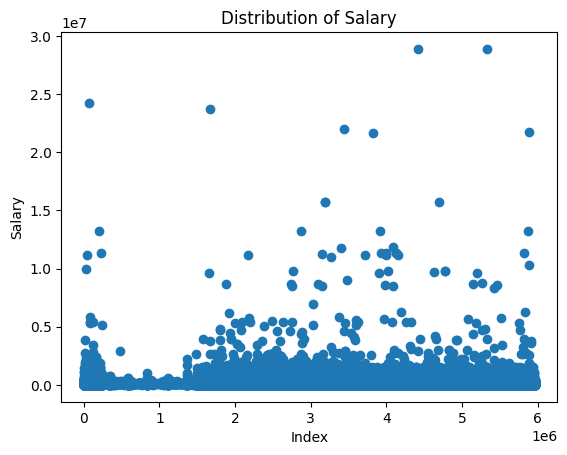

In [658]:
plt.scatter(grouped_df.index, grouped_df['salary'])
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Distribution of Salary')
plt.show()

In [659]:
df_customer_sociod['salary'].describe()

count    4.421820e+06
mean     1.155833e+05
std      2.000066e+05
min      1.202730e+03
25%      6.141532e+04
50%      8.844147e+04
75%      1.313092e+05
max      2.889440e+07
Name: salary, dtype: float64

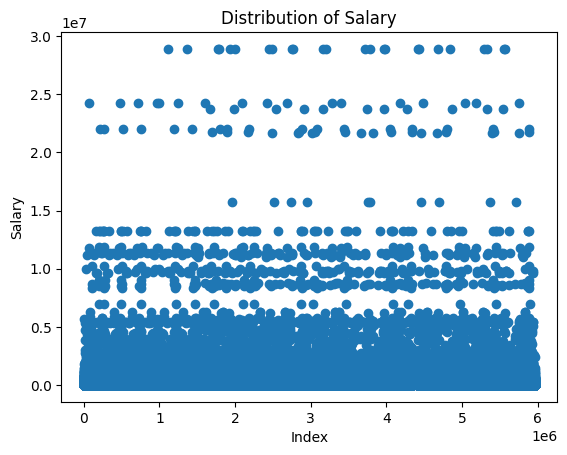

In [660]:
plt.scatter(df_customer_sociod.index, df_customer_sociod['salary'])
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Distribution of Salary')
plt.show()

In [661]:
salary_mapping = grouped_df.set_index('pk_cid')['salary']
df_customer_sociod['salary'] = df_customer_sociod['salary'].fillna(df_customer_sociod['pk_cid'].map(salary_mapping))

In [662]:
df_customer_sociod['salary'].isnull().sum()

0

In [663]:
df_customer_sociod['salary'].describe()

count    5.962924e+06
mean     1.115976e+05
std      1.870411e+05
min      0.000000e+00
25%      6.013257e+04
50%      8.687925e+04
75%      1.273923e+05
max      2.889440e+07
Name: salary, dtype: float64

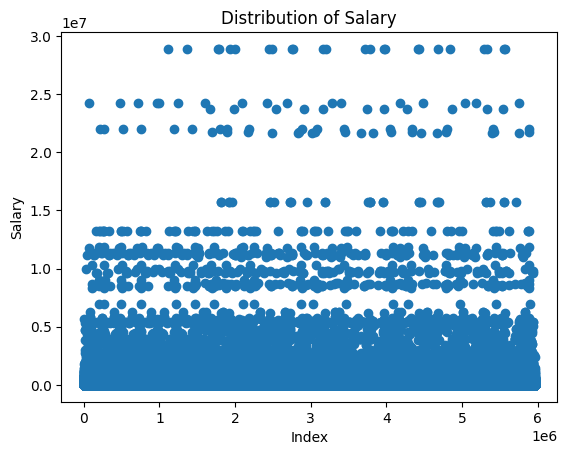

In [664]:
plt.scatter(df_customer_sociod.index, df_customer_sociod['salary'])
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Distribution of Salary')
plt.show()

#PREPROCESAMIENTO

Se cargan de nuevo los archivos originales.

In [665]:
df_customer_commercial_activity = pd.read_csv(os.path.join(DATA_PATH, "customer_commercial_activity.csv"))
df_prod_descrip = pd.read_csv(os.path.join(DATA_PATH, "product_description.csv"))
df_customer_products = pd.read_csv(os.path.join(DATA_PATH, "customer_products.csv"))
df_sales = pd.read_csv(os.path.join(DATA_PATH, "sales.csv"))
df_customer_sociod = pd.read_csv(os.path.join(DATA_PATH, "customer_sociodemographics.csv"))

Se realiza la función de preprocesamiento básico para los distintos df

In [666]:
def preprocess_df(df_name):

    df = globals()[df_name]  # Obtener el DataFrame a partir del nombre de la tabla
    df.columns = map(str.lower, df.columns)  # Convierte los nombres de las columnas a minúsculas

    if "entry_date" in df.columns:
        df["entry_date"] = pd.to_datetime(df["entry_date"], format="%Y-%m")  # Convierte la columna "entry_date" de formato de cadena a formato de fecha año y mes

    if "pk_partition" in df.columns:
        df["pk_partition"] = pd.to_datetime(df["pk_partition"], format="%Y-%m")  # Convierte la columna "pk_partition" de formato de cadena a formato de fecha año y mes

    if "month_sale" in df.columns:
        df["month_sale"] = pd.to_datetime(df["month_sale"], format="%Y-%m-%d")  # Convierte la columna "month_sale" de formato de cadena a formato de fecha año y mes

    if 'segment' in df.columns:
        df_segmento = pd.merge(df_customer_sociod[['pk_cid', 'age']], df[['pk_cid', 'segment', 'entry_channel']], on='pk_cid')
        df_segmento = df_segmento.drop_duplicates(subset='pk_cid')
        df_segmento.sort_values('age', inplace=True)
        df_segmento['segment'] = df_segmento.groupby('age')['segment'].transform(lambda x: x.fillna(x.value_counts().idxmax()))
        df['segment'] = df['segment'].fillna(df['pk_cid'].map(df_segmento.set_index('pk_cid')['segment']))

    if 'entry_channel' in df.columns:
        df_segmento = pd.merge(df_customer_sociod[['pk_cid', 'age']], df[['pk_cid', 'segment', 'entry_channel']], on='pk_cid')
        df_segmento = df_segmento.drop_duplicates(subset='pk_cid')
        df_segmento.sort_values('age', inplace=True)
        df_segmento['entry_channel'] = df_segmento.groupby('age')['entry_channel'].transform(lambda x: x.fillna(x.value_counts().idxmax()))
        df['entry_channel'] = df['entry_channel'].fillna(df['pk_cid'].map(df_segmento.set_index('pk_cid')['entry_channel']))

    if "credit_card" in df.columns:
        df['credit_card'] = pd.to_numeric(df['credit_card'], errors='coerce')

    if "active_customer" in df.columns:
        df['active_customer'] = pd.to_numeric(df['active_customer'], errors='coerce')

    if "payroll" in df.columns:
        df["payroll"] = df["payroll"].fillna(0)

    if "pension_plan" in df.columns:
        df["pension_plan"] = df["pension_plan"].fillna(0)

    if "region_code" in df.columns:
        df["region_code"] = df["region_code"].fillna(0)

    if "deceased" in df.columns:
        encoder = preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        deceased_column = df[['deceased']].values.reshape(-1, 1)  # Convertir a matriz 2D
        df['deceased'] = encoder.fit_transform(deceased_column)

    if 'cid' in df.columns:
        df = df.rename(columns={'cid': 'pk_cid'})

    if 'product_id' in df.columns:
        df = df.rename(columns={'product_id': 'pk_product_id'})

    if 'gender' in df.columns:
        most_frequent_gender = df["gender"].mode()[0]  # Obtiene el valor más frecuente en la columna "gender"
        df["gender"] = df["gender"].fillna(most_frequent_gender)  # Reemplaza los valores nulos en "gender" con el valor más frecuente

    if 'salary' in df.columns:
        grouped_df = df.sort_values(by=['pk_cid', 'age'], ascending=[True, False])
        grouped_df = grouped_df.drop_duplicates(subset='pk_cid', keep='first')
        grouped_df = grouped_df[['pk_cid', 'region_code', 'age', 'salary']]

        grouped_df.loc[grouped_df['age'] < 21, 'salary'] = grouped_df.loc[grouped_df['age'] < 21, 'salary'].fillna(0)
        grouped_df = grouped_df.sort_values(by=['age', 'region_code'])
        grouped_df['salary'] = grouped_df['salary'].bfill().ffill()
        salary_mapping = grouped_df.set_index('pk_cid')['salary']
        df['salary'] = df['salary'].fillna(df['pk_cid'].map(salary_mapping))

    df_processed = df.copy()  # Crear una copia del DataFrame preprocesado

    return df_processed


In [667]:
pipeline = Pipeline([
    ('preprocess', preprocess_df),
])

In [668]:
df_customer_sociod.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01,2018-01,2018-01,2018-01,2018-01
country_id,ES,ES,ES,ES,ES
region_code,29.0,13.0,13.0,50.0,50.0
gender,H,V,V,H,V
age,35,23,23,22,23
deceased,N,N,N,N,N
salary,87218.1,35548.74,122179.11,119775.54,NaN


### preprocesamiento df_customer_sociod

In [669]:
df_pp_customer_sociod= preprocess_df("df_customer_sociod")

In [670]:
df_pp_customer_sociod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   unnamed: 0    int64         
 1   pk_cid        int64         
 2   pk_partition  datetime64[ns]
 3   country_id    object        
 4   region_code   float64       
 5   gender        object        
 6   age           int64         
 7   deceased      float64       
 8   salary        float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 409.4+ MB


In [671]:
df_pp_customer_sociod.isnull().sum()

unnamed: 0      0
pk_cid          0
pk_partition    0
country_id      0
region_code     0
gender          0
age             0
deceased        0
salary          0
dtype: int64

### preprocesamiento df_customer_commercial_activity

In [672]:
df_pp_customer_commercial_activity= preprocess_df("df_customer_commercial_activity")

In [673]:
df_pp_customer_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   unnamed: 0       int64         
 1   pk_cid           int64         
 2   pk_partition     datetime64[ns]
 3   entry_date       datetime64[ns]
 4   entry_channel    object        
 5   active_customer  float64       
 6   segment          object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 318.5+ MB


In [674]:
df_pp_prod_descrip= preprocess_df("df_prod_descrip")

In [675]:
df_pp_prod_descrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   unnamed: 0      13 non-null     int64 
 1   pk_product_id   13 non-null     int64 
 2   product_desc    13 non-null     object
 3   family_product  13 non-null     object
dtypes: int64(2), object(2)
memory usage: 548.0+ bytes


### preprocesamiento df_customer_products

In [676]:
df_pp_customer_products= preprocess_df("df_customer_products")

In [677]:
df_pp_customer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   unnamed: 0          int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   short_term_deposit  int64         
 4   loans               int64         
 5   mortgage            int64         
 6   funds               int64         
 7   securities          int64         
 8   long_term_deposit   int64         
 9   em_account_pp       int64         
 10  credit_card         int64         
 11  payroll             float64       
 12  pension_plan        float64       
 13  payroll_account     int64         
 14  emc_account         int64         
 15  debit_card          int64         
 16  em_account_p        int64         
 17  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(15)
memory usage: 818.9 MB


In [678]:
df_pp_customer_products.isnull().sum()

unnamed: 0            0
pk_cid                0
pk_partition          0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

### preprocesamiento df_sales

In [679]:
df_sales.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_sale,6666,6667,6668,6669,6670
pk_cid,33620,35063,37299,39997,44012
month_sale,2018-05-01,2018-06-01,2018-02-01,2018-02-01,2018-02-01
pk_product_ID,2335,2335,2335,2335,2335
net_margin,952.9,1625.2,1279.7,1511.9,1680.3


In [680]:
df_pp_sales= preprocess_df("df_sales")

In [681]:
df_pp_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   unnamed: 0     240773 non-null  int64         
 1   pk_sale        240773 non-null  int64         
 2   pk_cid         240773 non-null  int64         
 3   month_sale     240773 non-null  datetime64[ns]
 4   pk_product_id  240773 non-null  int64         
 5   net_margin     240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 11.0 MB


In [682]:
df_pp_customer_sociod['salary'].describe()

count    5.962924e+06
mean     1.115973e+05
std      1.870412e+05
min      0.000000e+00
25%      6.013179e+04
50%      8.687925e+04
75%      1.273924e+05
max      2.889440e+07
Name: salary, dtype: float64

# MERGED DE LOS DATOS

Dataframes:

df_pp_customer_sociod : pk_cid, pk_partition

df_pp_sales : pk_cid, pk_sale, pk_product_id

df_pp_customer_products : pk_cid, pk_partition

df_pp_prod_descrip: pk_product_id

df_pp_customer_commercial_activity : pk_cid, pk_partition

## MERGED DE VENTAS POR PRODUCTOS: SALES, CUSTOMER_COMMERCIAL_ACTIVITY, PRODUCT_DESCRIPTION

In [683]:
df_merged = pd.DataFrame()

In [684]:
df_merged = df_pp_sales.join(df_pp_prod_descrip.set_index('pk_product_id'), on='pk_product_id', lsuffix='', rsuffix='_y')




In [685]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   unnamed: 0      240773 non-null  int64         
 1   pk_sale         240773 non-null  int64         
 2   pk_cid          240773 non-null  int64         
 3   month_sale      240773 non-null  datetime64[ns]
 4   pk_product_id   240773 non-null  int64         
 5   net_margin      240773 non-null  float64       
 6   unnamed: 0_y    240773 non-null  int64         
 7   product_desc    240773 non-null  object        
 8   family_product  240773 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 16.5+ MB


In [686]:
# Identificar las columnas que se repiten en ambos DataFrames
duplicate_columns = [col for col in df_merged.columns if col.endswith('_y')]

# Eliminar las columnas duplicadas
df_merged.drop(columns=duplicate_columns, inplace=True)

In [687]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   unnamed: 0      240773 non-null  int64         
 1   pk_sale         240773 non-null  int64         
 2   pk_cid          240773 non-null  int64         
 3   month_sale      240773 non-null  datetime64[ns]
 4   pk_product_id   240773 non-null  int64         
 5   net_margin      240773 non-null  float64       
 6   product_desc    240773 non-null  object        
 7   family_product  240773 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 14.7+ MB


In [688]:
df_merged[df_merged['pk_cid'] == 1387215].head(10)

,unnamed: 0,pk_sale,pk_cid,month_sale,pk_product_id,net_margin,product_desc,family_product
1690,1690,8356,1387215,2018-04-01,2335,1700.7,short_term_deposit,investment
5159,5159,11825,1387215,2019-02-01,1119,1001.1,funds,investment
6085,6085,12751,1387215,2018-07-01,2673,1260.1,securities,investment
15154,15154,21820,1387215,2018-04-01,2312,65.0,credit_card,payment_card
28487,28487,35153,1387215,2018-03-01,2234,69.1,payroll,account
47537,47537,54203,1387215,2018-03-01,1364,3746.6,pension_plan,pension_plan
64988,64988,71654,1387215,2018-04-01,2235,65.7,payroll_account,account
78450,78450,85116,1387215,2018-04-01,8871,44.5,emc_account,account
107765,107765,114431,1387215,2018-04-01,3819,68.7,debit_card,payment_card
140557,140557,147223,1387215,2018-03-01,4657,62.7,em_acount,account


In [689]:
print(df_merged['pk_cid'].value_counts())

pk_cid
1387215    10
1436512     9
1380507     9
1402957     9
1402199     9
           ..
1409414     1
1409413     1
1409412     1
1409410     1
1553571     1
Name: count, Length: 152754, dtype: int64


## MERGED DE SOCIODEMOGRÁFICO Y CUSTOMER PRODUCTS.

In [690]:
df_merged2 = pd.DataFrame()

In [691]:
df_merged2 = df_pp_customer_products.join(df_pp_customer_sociod.set_index(["pk_cid", "pk_partition"]), on=["pk_cid", "pk_partition"], lsuffix='', rsuffix='_y')

# Identificar las columnas que se repiten en ambos DataFrames
duplicate_columns = [col for col in df_merged2.columns if col.endswith('_y')]

# Eliminar las columnas duplicadas
df_merged2.drop(columns=duplicate_columns, inplace=True)

In [692]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   unnamed: 0          int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   short_term_deposit  int64         
 4   loans               int64         
 5   mortgage            int64         
 6   funds               int64         
 7   securities          int64         
 8   long_term_deposit   int64         
 9   em_account_pp       int64         
 10  credit_card         int64         
 11  payroll             float64       
 12  pension_plan        float64       
 13  payroll_account     int64         
 14  emc_account         int64         
 15  debit_card          int64         
 16  em_account_p        int64         
 17  em_acount           int64         
 18  country_id          object        
 19  region_code         float64       
 20  ge

In [693]:
df_merged2 = df_merged2.join(df_pp_customer_commercial_activity.set_index(["pk_cid", "pk_partition"]), on=["pk_cid", "pk_partition"], lsuffix='', rsuffix='_y')

# Identificar las columnas que se repiten en ambos DataFrames
duplicate_columns = [col for col in df_merged2.columns if col.endswith('_y')]

# Eliminar las columnas duplicadas
df_merged2.drop(columns=duplicate_columns, inplace=True)

In [694]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   unnamed: 0          int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   short_term_deposit  int64         
 4   loans               int64         
 5   mortgage            int64         
 6   funds               int64         
 7   securities          int64         
 8   long_term_deposit   int64         
 9   em_account_pp       int64         
 10  credit_card         int64         
 11  payroll             float64       
 12  pension_plan        float64       
 13  payroll_account     int64         
 14  emc_account         int64         
 15  debit_card          int64         
 16  em_account_p        int64         
 17  em_acount           int64         
 18  country_id          object        
 19  region_code         float64       
 20  ge

In [695]:
df_merged2.head()

,unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,...,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-01,0,0,0,0,0,0,0,...,ES,29.0,H,35,0.0,87218.10,2018-01-01,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01-01,0,0,0,0,0,0,0,...,ES,13.0,V,23,0.0,35548.74,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01-01,0,0,0,0,0,0,0,...,ES,13.0,V,23,0.0,122179.11,2015-08-01,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01-01,1,0,0,0,0,0,0,...,ES,50.0,H,22,0.0,119775.54,2015-08-01,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01-01,0,0,0,0,0,0,0,...,ES,50.0,V,23,0.0,148677.18,2015-08-01,KHE,1.0,03 - UNIVERSITARIO


In [696]:
df_merged2[df_merged2['pk_cid'] == 1387215].head(50).T

,584084,836838,1121946,1371157,1771509,1990769,2453837,2772483,3190683,3773815,3943637,4445133,4837960,5300716,5577019
unnamed: 0,1667901,2305122,2727756,3357237,4561710,5077214,6224434,6590990,7820090,9013628,9313045,10174361,11056365,12496625,13233913
pk_cid,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215
pk_partition,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
short_term_deposit,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
securities,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Tipos de clientes
Se crea una variable nueva que son clientes nuevos y clientes antiguos

In [697]:
new_clients = df_merged2.groupby('entry_date')['pk_cid'].nunique()
df_merged2['cliente_nuevo'] = (df_merged2['entry_date'] == df_merged2['pk_partition']).astype(int)


In [698]:
df_merged2[df_merged2['cliente_nuevo'] == 0].groupby('pk_partition')['pk_cid'].nunique()

pk_partition
2018-01-01    237315
2018-02-01    240012
2018-03-01    243072
2018-04-01    245560
2018-05-01    247931
2018-06-01    250232
2018-07-01    322631
2018-08-01    338544
2018-09-01    352143
2018-10-01    374315
2018-11-01    401093
2018-12-01    415186
2019-01-01    420061
2019-02-01    425854
2019-03-01    431119
2019-04-01    435175
2019-05-01    438612
Name: pk_cid, dtype: int64

In [699]:
df_merged2['tipo_cliente'] = df_merged2['cliente_nuevo'].map({1: 'Nuevo', 0: 'Antiguo'}) #se crea una columna nueva para identificar el cliente nuevo con su etiqueta nuevo o antiguo

###Nombres de provincias
Se crea una columna nueva en donde se identifican los nombres de las provincias.

In [700]:
provincias={1:'Alava',
2:'Albacete',
3:'Alicante',
4:'Almeria',
5:'Avila',
6:'Badajoz',
7:'Baleares',
8:'Barcelona',
9:'Burgos',
10:'Caceres',
11:'Cadiz',
12:'Castellon',
13:'Ciudad Real',
14:'Cordoba',
15:'La Coruna',
16:'Cuenca',
17:'Gerona',
18:'Granada',
19:'Guadalajara',
20:'Guipuzcoa',
21:'Huelva',
22:'Huesca',
23:'Jaen',
24:'Leon',
25:'Lerida',
26:'La Rioja',
27:'Lugo',
28:'Madrid',
29:'Malaga',
30:'Murcia',
31:'Navarra',
32:'Orense',
33:'Asturias',
34:'Palencia',
35:'Las Palmas',
36:'Pontevedra',
37:'Salamanca',
38:'Santa Cruz de Tenerife',
39:'Cantabria',
40:'Segovia',
41:'Sevilla',
42:'Soria',
43:'Tarragona',
44:'Teruel',
45:'Toledo',
46:'Valencia',
47:'Valladolid',
48:'Vizcaya',
49:'Zamora',
50:'Zaragoza',
51:'Ceuta',
52:'Melilla',
0:'Desconocida'}

In [701]:
df_merged2['Provincia']=df_merged2['region_code'].map(provincias)

## MERGED FINAL

### DF basado en particiones


In [702]:
df_merged_final2 = pd.DataFrame()

In [703]:
df_merged = df_merged.rename(columns={'month_sale' : 'pk_partition'})

In [704]:
df_merged_final2 = df_merged2.join(df_merged.set_index(["pk_cid", "pk_partition"]), on=["pk_cid", "pk_partition"], lsuffix='', rsuffix='_y')

In [705]:
# Identificar las columnas que se repiten en ambos DataFrames
duplicate_columns = [col for col in df_merged_final2.columns if col.endswith('_y')]

# Eliminar las columnas duplicadas
df_merged_final2.drop(columns=duplicate_columns, inplace=True)

In [706]:
df_merged_final2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6001003 entries, 0 to 5962923
Data columns (total 36 columns):
 #   Column              Dtype         
---  ------              -----         
 0   unnamed: 0          int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   short_term_deposit  int64         
 4   loans               int64         
 5   mortgage            int64         
 6   funds               int64         
 7   securities          int64         
 8   long_term_deposit   int64         
 9   em_account_pp       int64         
 10  credit_card         int64         
 11  payroll             float64       
 12  pension_plan        float64       
 13  payroll_account     int64         
 14  emc_account         int64         
 15  debit_card          int64         
 16  em_account_p        int64         
 17  em_acount           int64         
 18  country_id          object        
 19  region_code         float64       
 20  gender 

In [707]:
df_merged_final2.head()

,unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,...,active_customer,segment,cliente_nuevo,tipo_cliente,Provincia,pk_sale,pk_product_id,net_margin,product_desc,family_product
0,0,1375586,2018-01-01,0,0,0,0,0,0,0,...,1.0,02 - PARTICULARES,1,Nuevo,Malaga,NaN,NaN,NaN,NaN,NaN
1,1,1050611,2018-01-01,0,0,0,0,0,0,0,...,0.0,03 - UNIVERSITARIO,0,Antiguo,Ciudad Real,NaN,NaN,NaN,NaN,NaN
2,2,1050612,2018-01-01,0,0,0,0,0,0,0,...,0.0,03 - UNIVERSITARIO,0,Antiguo,Ciudad Real,NaN,NaN,NaN,NaN,NaN
3,3,1050613,2018-01-01,1,0,0,0,0,0,0,...,0.0,03 - UNIVERSITARIO,0,Antiguo,Zaragoza,NaN,NaN,NaN,NaN,NaN
4,4,1050614,2018-01-01,0,0,0,0,0,0,0,...,1.0,03 - UNIVERSITARIO,0,Antiguo,Zaragoza,NaN,NaN,NaN,NaN,NaN


In [708]:
df_merged_final2[df_merged_final2['pk_cid'] == 1387215].head(50).T


,584084,584084,584084,836838,836838,836838,836838,836838,1121946,1371157,...,1990769,2453837,2772483,3190683,3773815,3943637,4445133,4837960,5300716,5577019
unnamed: 0,1667901,1667901,1667901,2305122,2305122,2305122,2305122,2305122,2727756,3357237,...,5077214,6224434,6590990,7820090,9013628,9313045,10174361,11056365,12496625,13233913
pk_cid,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,...,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215,1387215
pk_partition,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,...,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
short_term_deposit,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
securities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [709]:
df_merged_final2[df_merged_final2['pk_cid'] == 1436512].head(50).T


,1954844,2525285,2810256,2810256,2810256,2810256,2810256,2970123,2970123,2970123,3659526,3797734,4473709,4657801,5399516,5699840
unnamed: 0,5041286,6295888,6628763,6628763,6628763,6628763,6628763,7460109,7460109,7460109,8899332,9037550,10202939,10876190,12595433,13356742
pk_cid,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512
pk_partition,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
short_term_deposit,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
em_account_pp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### DF basado en ventas


In [710]:
df_merged_final3 = pd.DataFrame()

In [711]:
df_merged = df_merged.rename(columns={'month_sale' : 'pk_partition'})

In [712]:
df_merged_final3 = df_merged.join(df_merged2.set_index(["pk_cid", "pk_partition"]), on=["pk_cid", "pk_partition"], lsuffix='', rsuffix='_y')

In [713]:
# Identificar las columnas que se repiten en ambos DataFrames
duplicate_columns = [col for col in df_merged_final3.columns if col.endswith('_y')]

# Eliminar las columnas duplicadas
df_merged_final3.drop(columns=duplicate_columns, inplace=True)

In [714]:
df_merged_final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   unnamed: 0          240773 non-null  int64         
 1   pk_sale             240773 non-null  int64         
 2   pk_cid              240773 non-null  int64         
 3   pk_partition        240773 non-null  datetime64[ns]
 4   pk_product_id       240773 non-null  int64         
 5   net_margin          240773 non-null  float64       
 6   product_desc        240773 non-null  object        
 7   family_product      240773 non-null  object        
 8   short_term_deposit  240773 non-null  int64         
 9   loans               240773 non-null  int64         
 10  mortgage            240773 non-null  int64         
 11  funds               240773 non-null  int64         
 12  securities          240773 non-null  int64         
 13  long_term_deposit   240773 no

In [715]:
df_merged_final2.head()

,unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,...,active_customer,segment,cliente_nuevo,tipo_cliente,Provincia,pk_sale,pk_product_id,net_margin,product_desc,family_product
0,0,1375586,2018-01-01,0,0,0,0,0,0,0,...,1.0,02 - PARTICULARES,1,Nuevo,Malaga,NaN,NaN,NaN,NaN,NaN
1,1,1050611,2018-01-01,0,0,0,0,0,0,0,...,0.0,03 - UNIVERSITARIO,0,Antiguo,Ciudad Real,NaN,NaN,NaN,NaN,NaN
2,2,1050612,2018-01-01,0,0,0,0,0,0,0,...,0.0,03 - UNIVERSITARIO,0,Antiguo,Ciudad Real,NaN,NaN,NaN,NaN,NaN
3,3,1050613,2018-01-01,1,0,0,0,0,0,0,...,0.0,03 - UNIVERSITARIO,0,Antiguo,Zaragoza,NaN,NaN,NaN,NaN,NaN
4,4,1050614,2018-01-01,0,0,0,0,0,0,0,...,1.0,03 - UNIVERSITARIO,0,Antiguo,Zaragoza,NaN,NaN,NaN,NaN,NaN


In [716]:
df_merged_final2[df_merged_final2['pk_cid'] == 1436512].head(50).T


,1954844,2525285,2810256,2810256,2810256,2810256,2810256,2970123,2970123,2970123,3659526,3797734,4473709,4657801,5399516,5699840
unnamed: 0,5041286,6295888,6628763,6628763,6628763,6628763,6628763,7460109,7460109,7460109,8899332,9037550,10202939,10876190,12595433,13356742
pk_cid,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512
pk_partition,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00
short_term_deposit,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
em_account_pp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [717]:
df_merged_final3[df_merged_final3['pk_cid'] == 1436512].head(50).T


,3696,10023,15530,30883,50060,67727,80442,113552,173081
unnamed: 0,3696,10023,15530,30883,50060,67727,80442,113552,173081
pk_sale,10362,16689,22196,37549,56726,74393,87108,120218,179747
pk_cid,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512,1436512
pk_partition,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-11-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-10-01 00:00:00,2018-08-01 00:00:00
pk_product_id,2335,2336,2312,2234,1364,2235,8871,3819,4657
net_margin,3416.2,1691.4,56.1,84.0,5838.2,78.4,72.3,68.8,75.6
product_desc,short_term_deposit,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
family_product,investment,investment,payment_card,account,pension_plan,account,account,payment_card,account
short_term_deposit,1,1,1,1,1,1,1,1,0
loans,0,0,0,0,0,0,0,0,0


#BAJAR EL DF FINAL

In [570]:
#df_merged_final2.to_csv(os.path.join(DATA_PATH, 'df_completo_partition.csv'), index=False)
#df_merged_final3.to_csv(os.path.join(DATA_PATH, 'df_completo_sales.csv'), index=False)
#df_merged.to_csv(os.path.join(DATA_PATH, 'df_ventas.csv'), index=False)
#df_merged2.to_csv(os.path.join(DATA_PATH, 'df_particiones.csv'), index=False)